(1) 데이터 가져오기
데이터 설명: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur...
특성 이름: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

(2) 입력 데이터 X 준비
X type: <class 'numpy.ndarray'>, dtype: float64
X shape: (442, 10)

(3) 타겟 데이터 y 준비
y type: <class 'numpy.ndarray'>, dtype: float64
y shape: (442,)

(4) Train/Test 데이터 분리
X_train shape: (353, 10), y_train shape: (353,)
X_test shape: (89, 10), y_test shape: (89,)

(5) 모델 준비
가중치 W 개수: 10
초기 W: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60

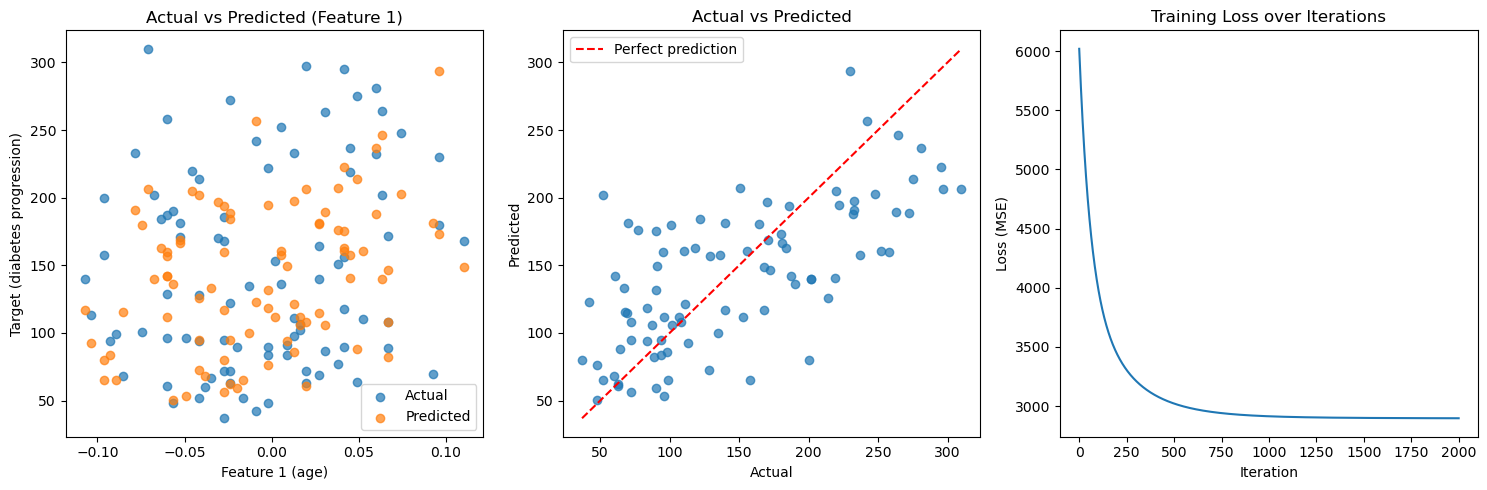


최종 결과 요약
학습된 가중치 W: [  39.936947   -236.72215623  550.34121333  340.34476807  -98.14965215
 -127.11860233 -215.74470329  149.03401373  411.07442752   71.8052117 ]
학습된 편향 b: 151.3038
Train MSE: 2898.0065
Test MSE: 2880.2506
R² Score: 0.4564

체크사항:
1) 회귀모델 예측정확도 (R²): 0.4564 (양호)
2) MSE 손실함수값 3000 이하: 2880.2506 ✓ 달성!


In [3]:
# 당뇨병 수치 예측 -선형회귀의 설계 및 이해 
# ============================================

# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes()
df_X = data.data
df_y = data.target

print("=" * 50)
print("(1) 데이터 가져오기")
print(f"데이터 설명: {data.DESCR[:500]}...")
print(f"특성 이름: {data.feature_names}")

# (2) 모델에 입력할 데이터 X 준비하기
X = np.array(df_X)
print("\n" + "=" * 50)
print("(2) 입력 데이터 X 준비")
print(f"X type: {type(X)}, dtype: {X.dtype}")
print(f"X shape: {X.shape}")

# (3) 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)
print("\n" + "=" * 50)
print("(3) 타겟 데이터 y 준비")
print(f"y type: {type(y)}, dtype: {y.dtype}")
print(f"y shape: {y.shape}")

# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n" + "=" * 50)
print("(4) Train/Test 데이터 분리")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# (5) 모델 준비하기
# 가중치 W와 편향 b 초기화
np.random.seed(42)  # 재현성을 위한 시드 설정
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print("\n" + "=" * 50)
print("(5) 모델 준비")
print(f"가중치 W 개수: {len(W)}")
print(f"초기 W: {W}")
print(f"초기 b: {b}")

def model(X, W, b):
    """
    선형 회귀 모델 함수
    y = X * W + b (행렬 연산)

    Parameters:
        X: 입력 데이터 (N x features)
        W: 가중치 벡터 (features,)
        b: 편향 스칼라

    Returns:
        predictions: 예측값 (N,)
    """
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]  # 각 특성에 대해 가중치를 곱해서 합산
    predictions += b  # 편향 추가
    return predictions

# (6) 손실함수 loss 정의하기
def MSE(a, b):
    """
    평균 제곱 오차 (Mean Squared Error)

    Parameters:
        a: 예측값
        b: 실제값

    Returns:
        mse: 평균 제곱 오차
    """
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    """
    손실 함수 - MSE를 사용하여 예측값과 실제값의 차이를 계산
    """
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

print("\n" + "=" * 50)
print("(6) 손실함수 정의 완료")
print(f"초기 손실값: {loss(X_train, W, b, y_train):.4f}")

# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    """
    경사하강법을 위한 기울기 계산 함수

    MSE의 미분:
    dL/dW = (2/N) * X^T * (y_pred - y)
    dL/db = (2/N) * sum(y_pred - y)

    Parameters:
        X: 입력 데이터
        W: 가중치
        b: 편향
        y: 실제값

    Returns:
        dW: W에 대한 기울기
        db: b에 대한 기울기
    """
    N = len(y)
    y_pred = model(X, W, b)

    dW = (1/N) * 2 * X.T.dot(y_pred - y)  # W에 대한 편미분
    db = 2 * (y_pred - y).mean()           # b에 대한 편미분

    return dW, db

print("\n" + "=" * 50)
print("(7) Gradient 함수 정의 완료")

# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.5  # 학습률 (데이터가 이미 정규화되어 있어 높은 학습률 사용 가능)

print("\n" + "=" * 50)
print("(8) 하이퍼파라미터 설정")
print(f"Learning Rate: {LEARNING_RATE}")

# (9) 모델 학습하기
print("\n" + "=" * 50)
print("(9) 모델 학습 시작")

losses = []
EPOCHS = 2000  # 충분한 학습을 위해 반복 횟수 증가

for i in range(1, EPOCHS + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 200 == 0:
        print(f'Iteration {i:4d} : Loss {L:.4f}')

print(f"\n최종 학습 손실값: {losses[-1]:.4f}")

# (10) test 데이터에 대한 성능 확인하기
print("\n" + "=" * 50)
print("(10) Test 데이터 성능 확인")

prediction = model(X_test, W, b)
mse_test = loss(X_test, W, b, y_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"목표 MSE (3000 이하): {'달성!' if mse_test < 3000 else '미달성'}")

# 추가 성능 지표
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print(f"R² Score: {r2:.4f}")

# (11) 정답 데이터와 예측한 데이터 시각화하기
print("\n" + "=" * 50)
print("(11) 시각화")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 그래프 1: 첫 번째 특성 vs 실제값/예측값
axes[0].scatter(X_test[:, 0], y_test, label='Actual', alpha=0.7)
axes[0].scatter(X_test[:, 0], prediction, label='Predicted', alpha=0.7)
axes[0].set_xlabel('Feature 1 (age)')
axes[0].set_ylabel('Target (diabetes progression)')
axes[0].set_title('Actual vs Predicted (Feature 1)')
axes[0].legend()

# 그래프 2: 실제값 vs 예측값 (이상적인 경우 y=x 선상에 위치)
axes[1].scatter(y_test, prediction, alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect prediction')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Actual vs Predicted')
axes[1].legend()

# 그래프 3: 손실값 변화
axes[2].plot(losses)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Loss (MSE)')
axes[2].set_title('Training Loss over Iterations')

plt.tight_layout()
plt.savefig('/home/jovyan/work/AIFFEL_quest_eng/Data_Analysis/DA01/diabetes_result.png', dpi=150)
plt.show()

# 최종 결과 요약
print("\n" + "=" * 50)
print("최종 결과 요약")
print("=" * 50)
print(f"학습된 가중치 W: {W}")
print(f"학습된 편향 b: {b:.4f}")
print(f"Train MSE: {losses[-1]:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"\n체크사항:")
print(f"1) 회귀모델 예측정확도 (R²): {r2:.4f} {'(양호)' if r2 > 0.4 else '(개선 필요)'}")
print(f"2) MSE 손실함수값 3000 이하: {mse_test:.4f} {'✓ 달성!' if mse_test < 3000 else '✗ 미달성'}")
